In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
df = pd.read_csv('Delivery.csv')

In [3]:
df = pd.read_csv('Delivery.csv')

duplicados = df[df.duplicated(keep='first')]
df.drop_duplicates(keep='first', inplace=True) #removendo duplicadas mas acho que não tinha nenhuma
df= df[df['estimated_store_to_consumer_driving_duration'] <= 15000]
df= df[df['total_outstanding_orders'] <= 20000]
df= df[df['awaited_time'] <= 20000]

df= df[df['total_items'] > 0]

df= df[df['total_items'] <= 300]
df= df[df['total_items'] > 0]

df = df[df['delivery_location'] != 'casa do davi']

df = df[df['delivery_location'] != 'casa do sasaki']

colunas_string = ["created_at", "actual_delivery_time", "delivery_location"]

for coluna in df.columns:
    if coluna not in colunas_string:
       # print(f"A coluna {coluna} está sendo verificada")  # Ajuste no print para melhor leitura
        df[coluna] = df[coluna].apply(lambda x: np.nan if x < 0 else x) #substitui valores negativos das colunas numéricas por NaN
        
   # print(coluna)
   # print(df[coluna].unique())
   # print(len(df[coluna].unique()))
   # print()

In [4]:
num_linhas_com_nan = df.isna().any(axis=1).sum()
percentual_Nan = num_linhas_com_nan / len(df)
print("O percentual de linhas com valores NaN é %.3f. Por ser um valor baixo acredito que esses valores podem ser excluídos sem perda qualitativa dos dados."%(percentual_Nan))
df.dropna(inplace=True) # Remove as linhas com valores Nan do dataframe


O percentual de linhas com valores NaN é 0.040. Por ser um valor baixo acredito que esses valores podem ser excluídos sem perda qualitativa dos dados.


/tmp/ipykernel_14700/322590945.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


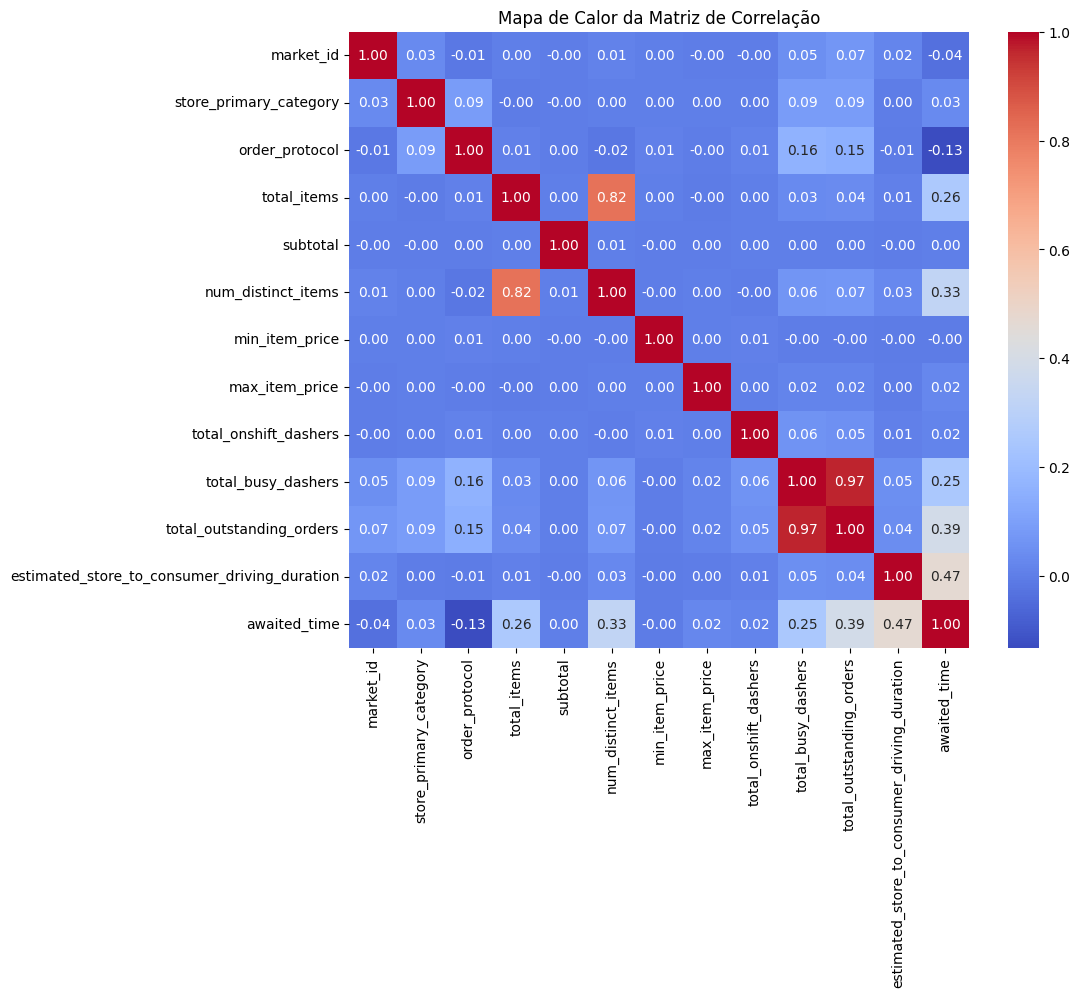

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()


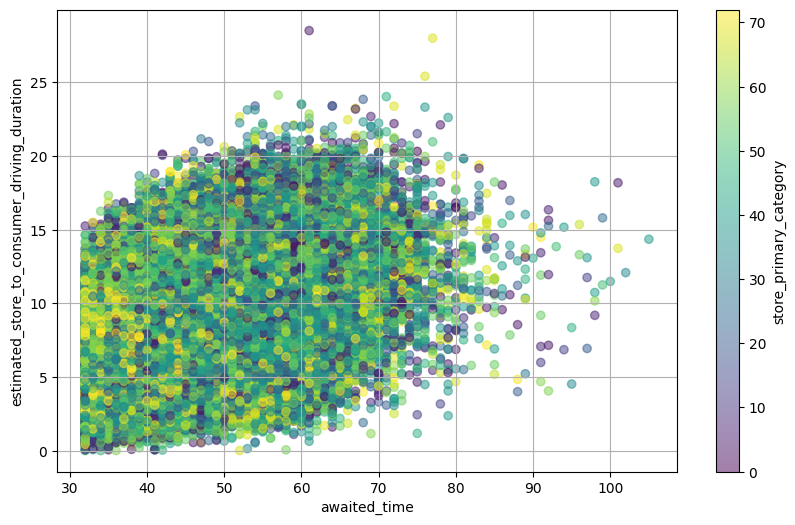

In [6]:
def plot(x, y, color_by):
    plt.figure(figsize=(10,6))
    plt.xlabel(x)
    plt.ylabel(y)
    scatter = plt.scatter(df[x], df[y], alpha=0.5, c=df[color_by], cmap='viridis')  # 'viridis' é um exemplo de mapa de cores
    plt.grid(True)
    plt.colorbar(scatter, label=color_by)  # Adiciona uma barra de cores para interpretar os valores
    plt.show()
plot('awaited_time','estimated_store_to_consumer_driving_duration',"store_primary_category")    

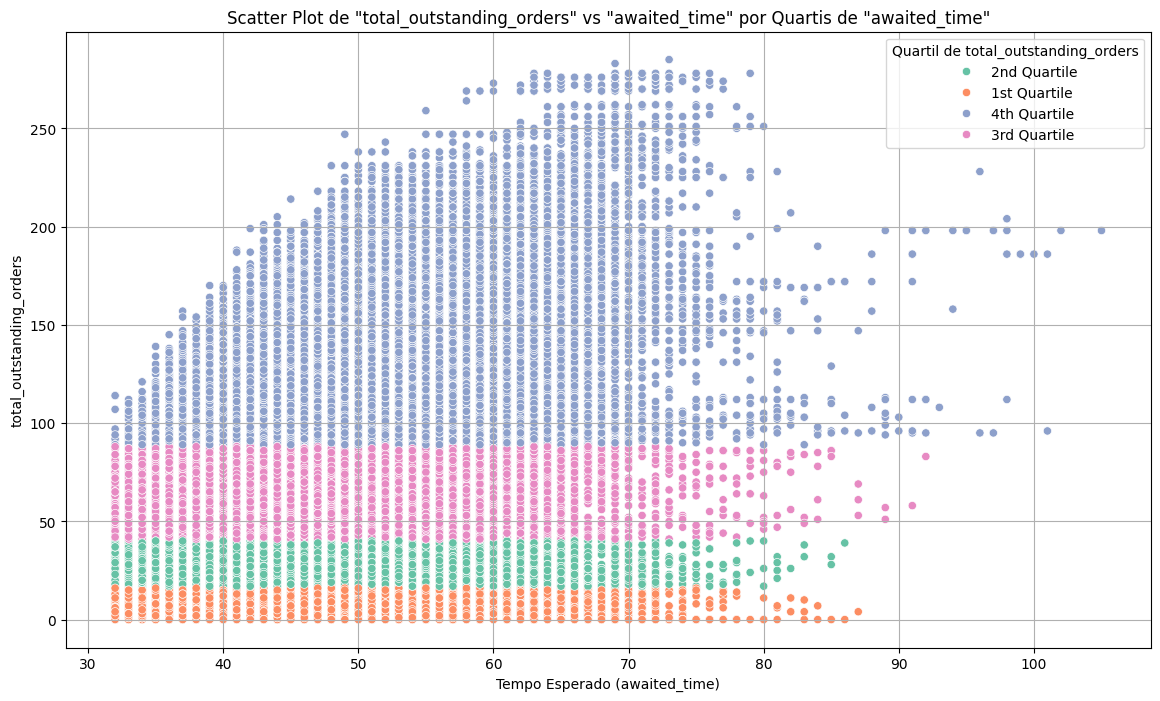

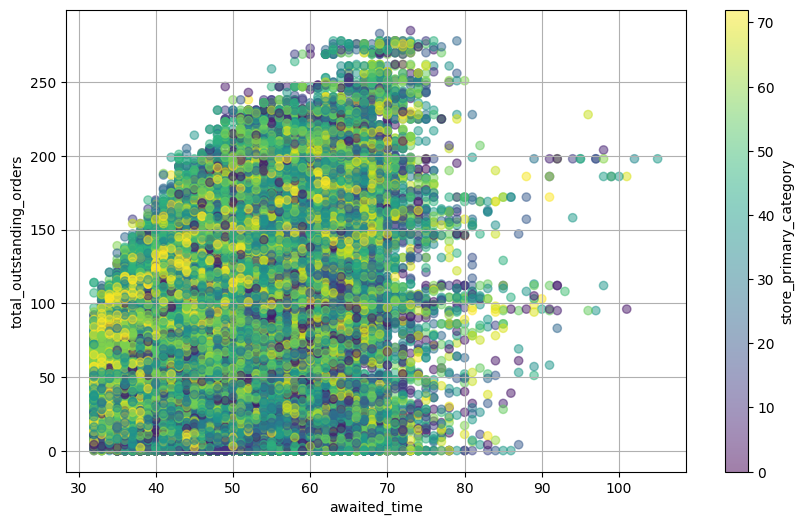

In [31]:
# Calculating quartiles for 'awaited_time'
quartiles = df['total_outstanding_orders'].quantile([0.25, 0.5, 0.75])

# Categorizing each row into a quartile
conditions = [
    df['total_outstanding_orders'] <= quartiles[0.25],
    df['total_outstanding_orders'] <= quartiles[0.5],
    df['total_outstanding_orders'] <= quartiles[0.75],
    df['total_outstanding_orders'] > quartiles[0.75]
]
choices = ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']
df['total_outstanding_orders_quartile'] = np.select(conditions, choices, default='Unknown')

# Creating scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='awaited_time', y='total_outstanding_orders', hue='total_outstanding_orders_quartile', palette='Set2')
plt.title('Scatter Plot de "total_outstanding_orders" vs "awaited_time" por Quartis de "awaited_time"')
plt.ylabel('total_outstanding_orders')
plt.xlabel('Tempo Esperado (awaited_time)')
plt.legend(title='Quartil de total_outstanding_orders')
plt.grid(True)
plt.show()

plot("awaited_time", "total_outstanding_orders", "store_primary_category")

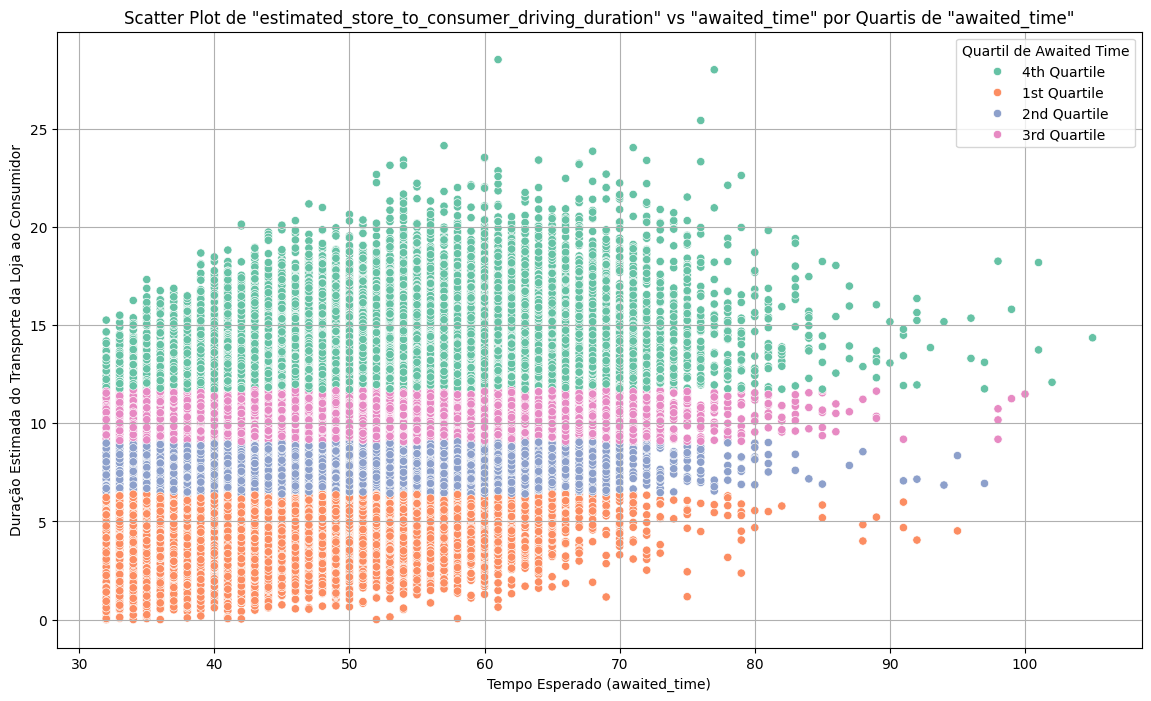

In [30]:
# Calculating quartiles for 'awaited_time'
quartiles = df['estimated_store_to_consumer_driving_duration'].quantile([0.25, 0.5, 0.75])

# Categorizing each row into a quartile
conditions = [
    df['estimated_store_to_consumer_driving_duration'] <= quartiles[0.25],
    df['estimated_store_to_consumer_driving_duration'] <= quartiles[0.5],
    df['estimated_store_to_consumer_driving_duration'] <= quartiles[0.75],
    df['estimated_store_to_consumer_driving_duration'] > quartiles[0.75]
]
choices = ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']
df['estimated_store_to_consumer_driving_duration_quartile'] = np.select(conditions, choices, default='Unknown')

# Creating scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='awaited_time', y='estimated_store_to_consumer_driving_duration', hue='estimated_store_to_consumer_driving_duration_quartile', palette='Set2')
plt.title('Scatter Plot de "estimated_store_to_consumer_driving_duration" vs "awaited_time" por Quartis de "awaited_time"')
plt.ylabel('Duração Estimada do Transporte da Loja ao Consumidor')
plt.xlabel('Tempo Esperado (awaited_time)')
plt.legend(title='Quartil de Awaited Time')
plt.grid(True)
plt.show()


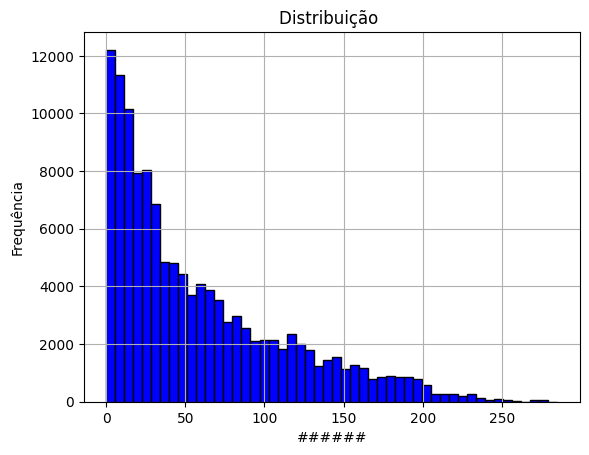

In [29]:
#plt.figure(figsize=(8, 8))  # Ajuste o tamanho conforme necessário

# Criando o histograma
plt.hist(df['total_outstanding_orders'], bins=50, color='blue', edgecolor='black')

plt.title('Distribuição ')
plt.xlabel('######')
plt.ylabel('Frequência')
plt.grid(True)  # Adiciona grade para melhor leitura
plt.show()

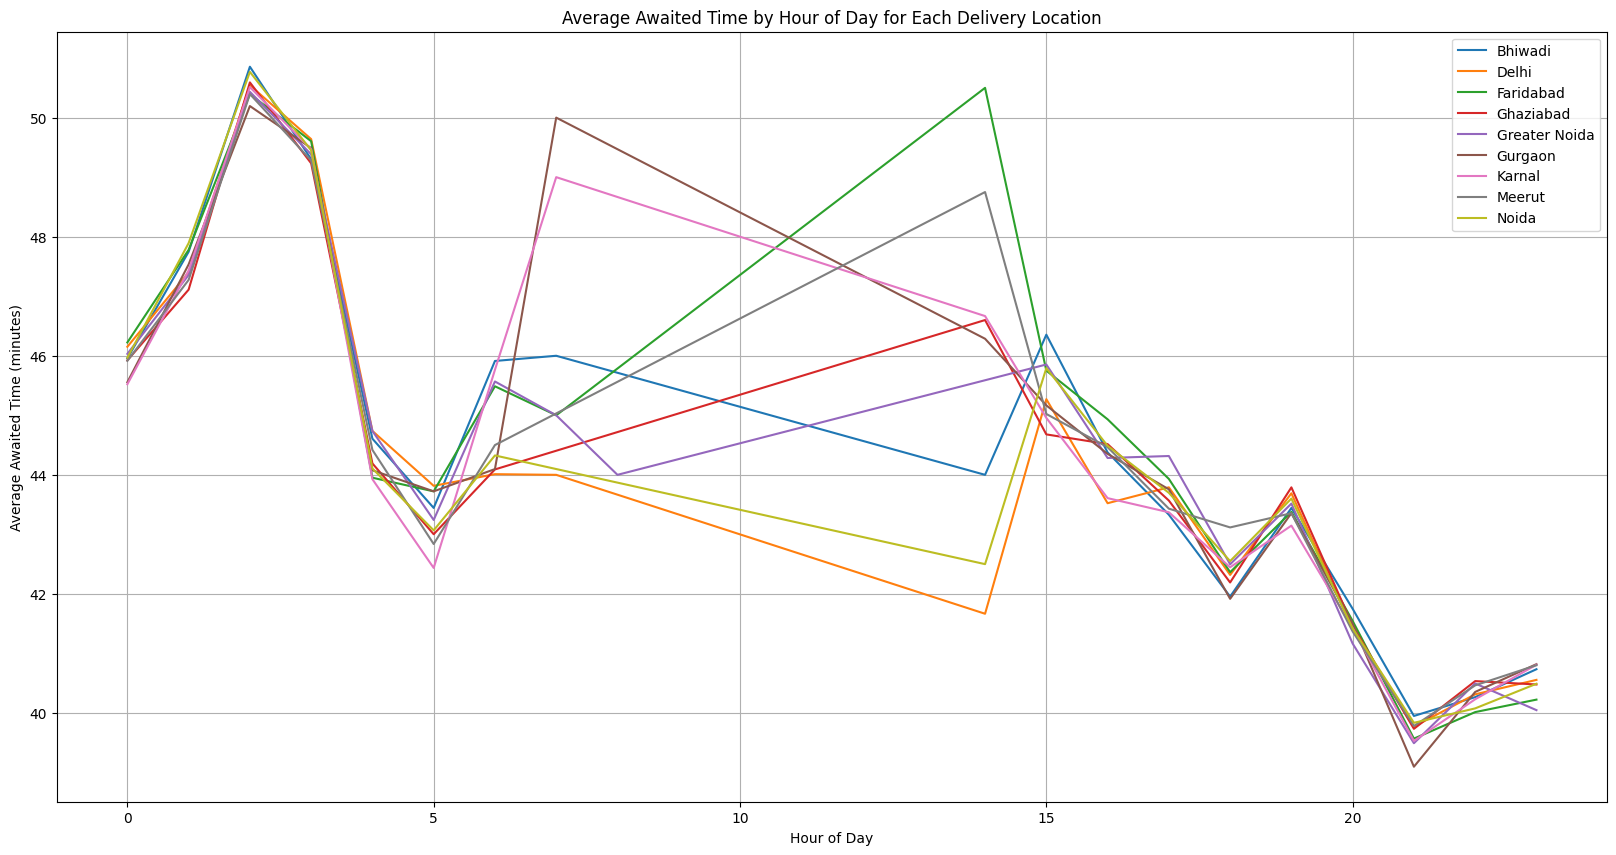

In [10]:

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['hour_of_day'] = df['created_at'].dt.hour
# Set the figure size for better readability
plt.figure(figsize=(20, 10))
clean_time_series_data = df.groupby(['delivery_location', 'hour_of_day'])['awaited_time'].mean().reset_index()

# Get unique delivery locations
unique_locations = clean_time_series_data['delivery_location'].unique()

# Create a plot for each delivery location
for location in unique_locations:
    # Filter the data for the current location
    location_data = clean_time_series_data[clean_time_series_data['delivery_location'] == location]
    
    # Plot the data
    plt.plot(location_data['hour_of_day'], location_data['awaited_time'], label=location)

# Add title and labels
plt.title('Average Awaited Time by Hour of Day for Each Delivery Location')
plt.xlabel('Hour of Day')
plt.ylabel('Average Awaited Time (minutes)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
